# Analiza glasbene lestvice iTunes

Odločil sem se narediti analizo na eni izmed vodilnih "streaming" platform
iTunes, preko katere tudi sam poslušam glasbo. Podatke sem pridobil na spletni strani: https://kworb.net

### Nekaj o podatkih

V arhivu spletne strani sem dobil lestvice popularnosti za vsak dan od leta 2011 do danes. Za vsak dan je shranjena lestvica 200 (včasih 250) najpopularnejših pesmi na iTunes. Zaradi ogromne količine podatkov sem se odločil analizirati samo leto 2022. Kljub temu je v analizi vključenih več kot 70,000 vnosov

Hkrati je za vsak vnos, poleg mesta na globalni lestvici, tudi mesto na posameznih državnih lestvicah. Veliko držav ima svojo lestvico ampak sem se za to analizo omejil na par večjih držav, Slovenijo in sosede Sloveniji.

Format vnosa:
##### [Year, Month, Day, Position, Title, Artist, Days On Chart, Peak Chart Poistion, Days At PCP, US, UK, AU, DE, FR, RU, JP, ES, CZ, PL, SI, AT, CR, HU, IT]
###### (vrednost na polju SI je pozicija pesmi na Slovenski lestvici)


In [615]:
# Uvoz potrebnih knjižnic
import pandas as pd  
import matplotlib.pyplot as plt 
import numpy as np 


#Koda v tem sklopu je namenjena prikazu surovih podatkov

# Branje podatkov iz datoteke 'output.csv' v dataframe
data = pd.read_csv('output.csv')

# Željeni vrstni red stolpcev v podatkovnem okviru
desired_order = ['Title', 'Artist', 'Year', 'Month', 'Day', 'Position', 'Days On Chart',
                 'Peak Chart Poistion', 'Days At PCP', 'US', 'UK', 'AU', 'DE', 'FR', 'RU',
                 'JP', 'ES', 'CZ', 'PL', 'SI', 'AT', 'CR', 'HU', 'IT']

data = data[desired_order]

# Izpis prvih vrstic
print(data.head())

           Title                     Artist  Year  Month  Day  Position  \
0     Easy On Me                      Adele  2022      1    1         1   
1     Cold Heart  Elton John &amp; Dua Lipa  2022      1    1         2   
2  Happiest Year               Jaymes Young  2022      1    1         3   
3        Shivers                 Ed Sheeran  2022      1    1         4   
4    Do It To It                     Acraze  2022      1    1         5   

   Days On Chart  Peak Chart Poistion  Days At PCP    US   UK   AU   DE    FR  \
0             79                    1         50.0   5.0  4.0  4.0  9.0   4.0   
1            142                    1         19.0   4.0  3.0  1.0  1.0   2.0   
2             15                    3          2.0   1.0  1.0  3.0  2.0  11.0   
3            114                    3         36.0  10.0  2.0  6.0  5.0   6.0   
4             79                    4          NaN  46.0  7.0  5.0  4.0  10.0   

     RU  JP    ES    CZ    PL    SI    AT  CR   HU    IT  
0  

Vprašanje, ki se ga nekateri sprašujejo: Katera pesem je najboljša?

Seveda ne morem direktno odgovoriti na to vprašanje, lahko pa se vprašam podobna vprašanja na katera imam odgovor.

### Katera pesem je bila največkrat med 10 najboljših?

In [616]:
# Filtriram podatke tako, da dobim samo pesmi z pozicijo na lestvici <= 10
top_10_songs = data[data['Position'] <= 10]

# Grupira po artist/title (tako, da so tisti podatki z istimi lastnosti skupaj)
# Potem .size() združi te podatke in si zapomni count
#Na koncu reset_index naredi nov dataframe z stolpci: artist/title/column
top_10_counts = top_10_songs.groupby(['Title', 'Artist']).size().reset_index(name='Count')

# sortiram
sorted_top_10_songs = top_10_counts.sort_values(by='Count', ascending=False)

# vzamem zgornjih 5
top_5_top_10_songs = sorted_top_10_songs.head(5)

print("Top 5 songs with most appearances in top 10:")
for index, row in top_5_top_10_songs.iterrows():
    print("Title:", row['Title'])
    print("Artist:", row['Artist'])
    print("Appearances in top 10:", row['Count'])
    print("--------------------------")

Top 5 songs with most appearances in top 10:
Title: As It Was
Artist: Harry Styles
Appearances in top 10: 259
--------------------------
Title: Cold Heart
Artist: Elton John &amp; Dua Lipa
Appearances in top 10: 255
--------------------------
Title: I Ain't Worried
Artist: OneRepublic
Appearances in top 10: 166
--------------------------
Title: Bam Bam
Artist: Camila Cabello
Appearances in top 10: 163
--------------------------
Title: Hold My Hand
Artist: Lady Gaga
Appearances in top 10: 152
--------------------------


### Katera pesem je bila največkrat na prvem mestu?

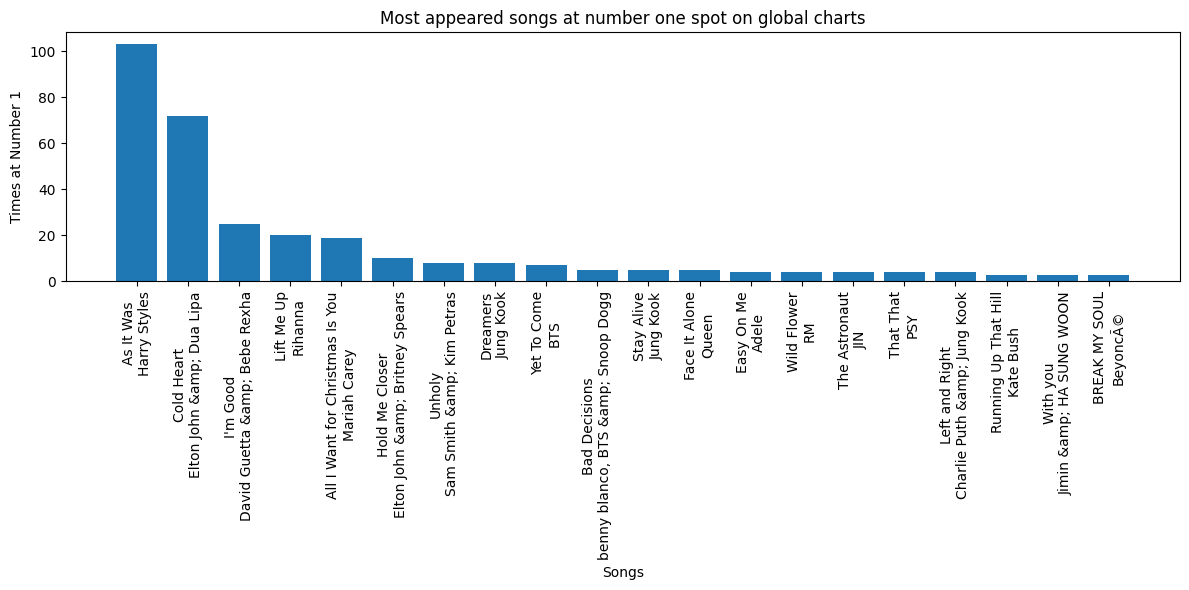

In [617]:
#enak princip kot prej
number_one_songs = data[data['Position'] == 1]

number_one_counts = number_one_songs.groupby(['Title', 'Artist']).size().reset_index(name='Count')

sorted_number_one_songs = number_one_counts.sort_values(by='Count', ascending=False)

top_number_one_songs = sorted_number_one_songs.head(20)




# Risanje grafa
plt.figure(figsize=(12, 6))
bars = plt.bar(top_number_one_songs['Title'] +"\n"+ top_number_one_songs['Artist'], top_number_one_songs['Count'])
plt.xlabel('Songs')
plt.ylabel('Times at Number 1')
plt.title('Most appeared songs at number one spot on global charts')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Kot kaže je **As It Was - Harry Styles** pesem z največ prvimi mesti in največ pojavitvami med top 10.

### Ali je tudi pesem, ki se največkrat pojavi na lestvici v splošnem?

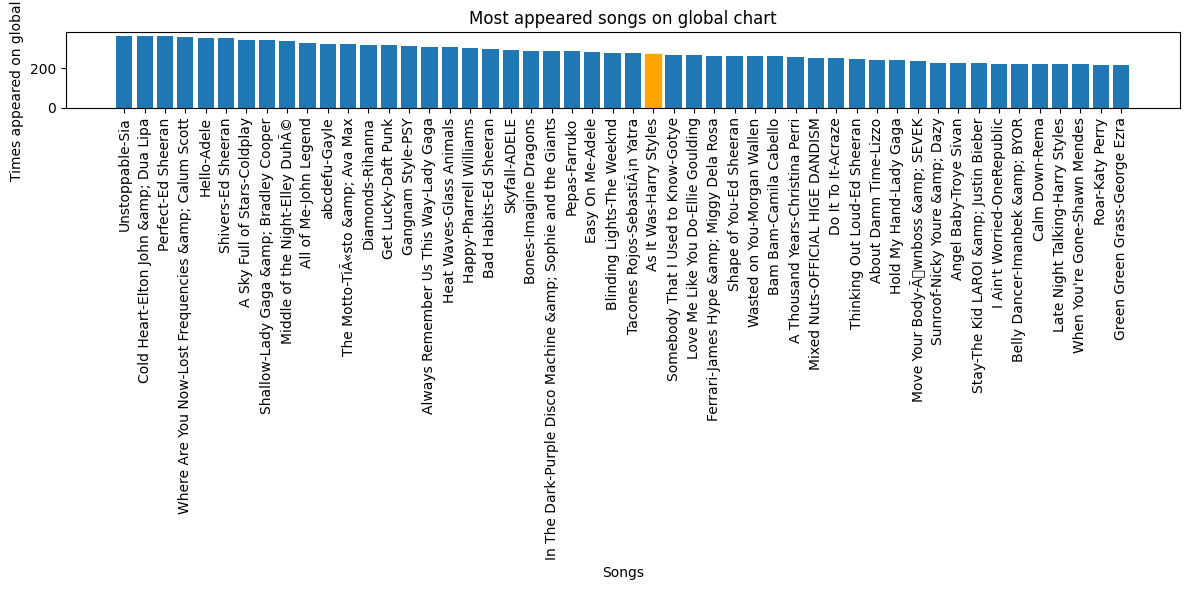

Number of songs ranked higher than top song: 26


In [618]:
#enak princip kot prej
song_counts = data.groupby(['Title', 'Artist']).size().reset_index(name='Count')

sorted_songs = song_counts.sort_values(by='Count', ascending=False)

most_appeared_songs = sorted_songs.head(50)

#dataframe top_number_one_songs je od prej
top_song = top_number_one_songs.iloc[0]

# Risanje grafa
plt.figure(figsize=(12, 6))
bars = plt.bar(most_appeared_songs['Title'] + "-" + most_appeared_songs['Artist'], most_appeared_songs['Count'])
plt.xlabel('Songs')
plt.ylabel('Times appeared on global chart')
plt.title('Most appeared songs on global chart')
plt.xticks(rotation=90)

for bar, title in zip(bars, most_appeared_songs['Title']):
    if title == top_song['Title']:
        bar.set_color('orange')

plt.tight_layout()
plt.show()

# Poiščem kolikokrat se je pojavila "največkrat prva" pesem
top_song_count = sorted_songs[(sorted_songs['Title'] == top_song['Title']) & (sorted_songs['Artist'] == top_song['Artist'])]['Count'].iloc[0]

# Preštejem koliko pesmi ima večje pojavitve čez celotno leto kot "največkrat prva"
songs_with_higher_count = len(sorted_songs[sorted_songs['Count'] > top_song_count])

print("Number of songs ranked higher than top song:", songs_with_higher_count)


Pričakoval sem, da bo pesem, ki je največkrat na prvem mestu in hkrati največkrat med top 10, tudi pesem z največ pojavitvami na lestvici.

V tem primeru temu ni tako saj je bila izdana šele 1. Aprila 2022

### Zanimivo je, da se je takrat tudi prvič pojavila na lestvici in to na prvem mestu!

In [619]:

# ustvarim nov stolpec date, ki združi leto mesec in dan v datum, ki ga je lažje sortirati
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])

#vzamem samo top pesem
filtered_data = data[(data['Title'] == top_song['Title']) & (data['Artist'] == top_song['Artist'])]

# kdaj se prvič pojavi
first_appearance = filtered_data['Date'].min()

# najvišji položaj na lestvici
peak_position = filtered_data['Peak Chart Poistion'].min()

# prvi dan na najvišjem položaju
first_date_at_peak_position = filtered_data[filtered_data['Peak Chart Poistion'] == peak_position]['Date'].min()

print(f"Song: {top_song['Title']} - {top_song['Artist']}")
print(f"First Appearance: {first_appearance}")
print(f"Peak Position: {peak_position}")
print(f"First Date at Peak Position: {first_date_at_peak_position}")

Song: As It Was - Harry Styles
First Appearance: 2022-04-01 00:00:00
Peak Position: 1
First Date at Peak Position: 2022-04-01 00:00:00


### Pogledam še pot "najboljših" pesmi 2022

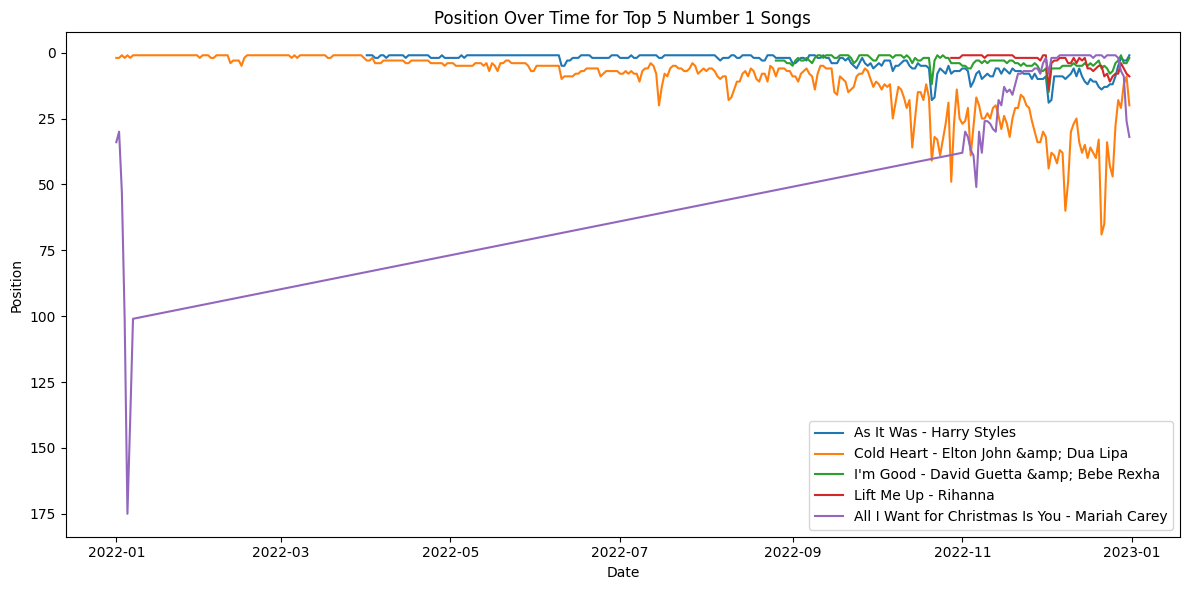

In [620]:
# Plotting
plt.figure(figsize=(12, 6))

for index, row in top_number_one_songs.head(5).iterrows():  #spet uporabim dataset od prejšnje naloge
    song_data = data[(data['Title'] == row['Title']) & (data['Artist'] == row['Artist'])]

    plt.plot(song_data['Date'], song_data['Position'], label=f"{row['Title']} - {row['Artist']}")

plt.xlabel('Date')
plt.ylabel('Position')
plt.title('Position Over Time for Top 5 Number 1 Songs')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.legend() 
plt.show()

Zanimivo je opaziti pesem **All I Want for Christmas Is You - Mariah Carey**.

Praktično ne obstaja čez leto ampak je decembra tolikokrat na prvem mestu, da je to dovolj za 5. mesto v celotnem letu.

### Kaj pa najbolj uspešne pesmi v Sloveniji?

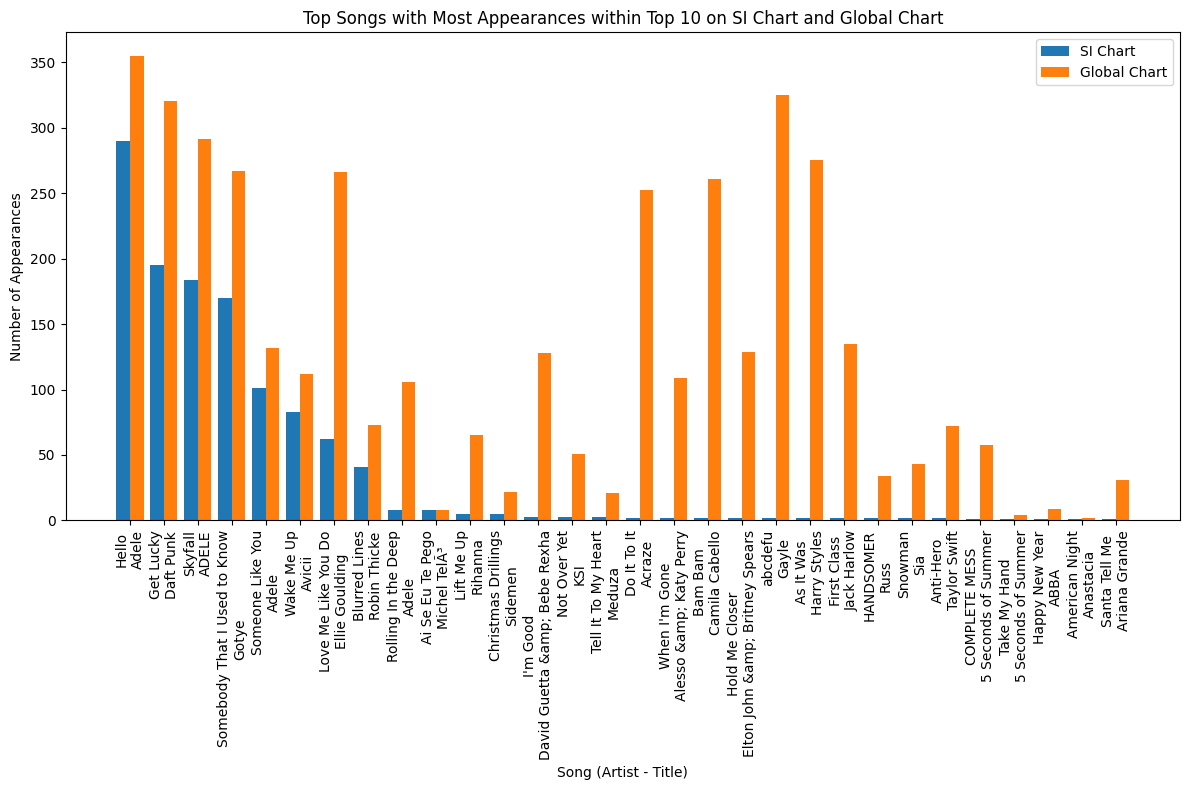

In [621]:
# Filtriram podatke za Slovenijo
# Načeloma lahko vpišem v spodnjo vrstico katerokoli državo in bo delovalo :)
# Če to želite narediti lahko izbirate med temi državami:
# ['US', 'UK', 'AU', 'DE', 'FR', 'RU', 'JP', 'ES', 'CZ', 'PL', 'SI', 'AT', 'CR', 'HU', 'IT']

COUNTRY = "SI"
top_10_data_COUNTRY = data[data[COUNTRY] <= 10]

# Podobno kot prej grupby bo naredit nov dataframe z istimi pesmi grupirami skupaj,
#potem pa size združi enake in prešteje
song_appearances_top_10_COUNTRY = top_10_data_COUNTRY.groupby(['Artist', 'Title']).size()

#  Poiščem te z največjimi pojavitvami (30 najpopularnejših)
TOP_song_appearances_top_10_COUNTRY = song_appearances_top_10_COUNTRY.nlargest(30)

# naredim nov dataframe z pesmi v globalnem chartu ki so tudi v top 30 COUNTRY chartu
global_chart_appearances = data[data['Artist'].isin(TOP_song_appearances_top_10_COUNTRY.index.get_level_values(0))]

# enako kot prej za globalne
song_appearances_top_10_global = global_chart_appearances.groupby(['Artist', 'Title']).size()

# združim dataframe tako da imam hkrati podatke za posamezno državo in globalne charte
# tukaj so podatki tudi sortirani po najboljših v COUNTRY specific (ker sem jih za ta dataframe tako sortiral v tisti vrstici 30 najpop..)
combined_data = pd.concat([TOP_song_appearances_top_10_COUNTRY, song_appearances_top_10_global], axis=1, join='inner')
combined_data.columns = ['Country Chart', 'Global Chart']

# Plotting
plt.figure(figsize=(12, 8))
positions = np.arange(len(combined_data))

bar_width = 0.4
offset = bar_width / 2



plt.bar(positions - offset, combined_data['Country Chart'], bar_width, label=f'{COUNTRY} Chart')
plt.bar(positions + offset, combined_data['Global Chart'], bar_width, label='Global Chart')

plt.title(f"Top Songs with Most Appearances within Top 10 on {COUNTRY} Chart and Global Chart")
plt.xlabel('Song (Artist - Title)')
plt.ylabel('Number of Appearances')
plt.xticks(positions, combined_data.index.get_level_values('Title') + "\n" + combined_data.index.get_level_values('Artist'), rotation=90)
plt.legend()
plt.tight_layout()

# Show the graph
plt.show()

Iz grafa opazim, da je prvih 5 najpopularnejših pesmi v Sloveniji tudi popularnih na globalni lestvici.

Za te pesmi se tudi pojavitve ujemajo, torej padajo hkrati na slovenski in globalni lestvici podobno. 

Ko pa pogledam večji nabor opazim, da je Slovencem všeč manj pesmi. 

Velikokrat se zgodi, da se pesem skoraj ne pojavi v SI lestvici, na globalni lestvici pa je vseeno med najpopularnejšimi.

### Kdo so bili najbolj uspešni avtorji?

naslednja grafa prikazujeta avtorje z največ pojavitvami na celotni lestvici oziroma največ pojavitvami med top 10.

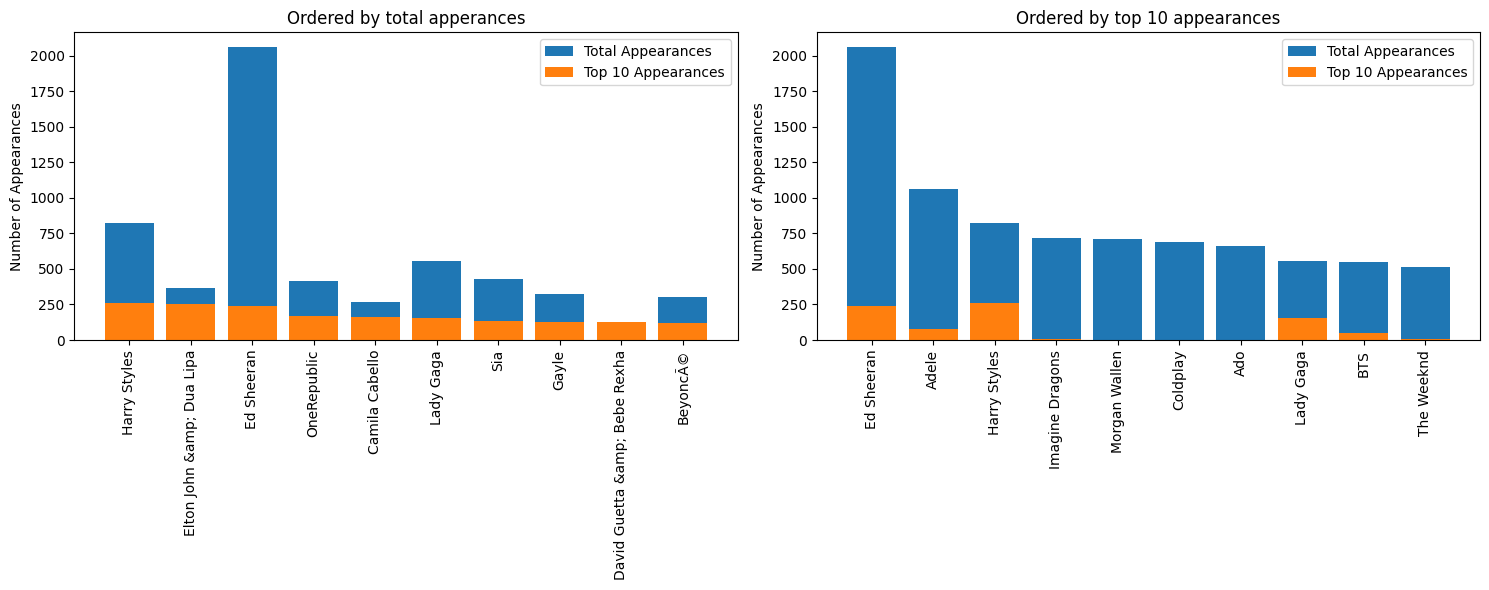

In [622]:
# Vzame samo artists in jih prešteje. Ostali podatki se zgubijo
artist_total_appearances = data['Artist'].value_counts()

# vzamemo samo podatke z pozicijo nad 10
top_10_data = data[data['Position'] <= 10]

# preštejemo zdaj samo artiste med top 10
artist_appearances_top_10 = top_10_data['Artist'].value_counts()

# 10 z največ count
top_artists_top_10 = artist_appearances_top_10.nlargest(10)

# 10 z največ count
top_artists_total = artist_total_appearances.nlargest(10)

# ustvarim dictionary z ključi:
# ('Artist', 'Total Appearances', 'Top 10 Appearances') 
graph_data_top_10 = pd.DataFrame({
    'Artist': top_artists_top_10.index,
    'Total Appearances': [artist_total_appearances.get(artist, 0) for artist in top_artists_top_10.index],
    'Top 10 Appearances': top_artists_top_10.values
})

# podobno kot zgoraj
graph_data_total = pd.DataFrame({
    'Artist': top_artists_total.index,
    'Total Appearances': top_artists_total.values,
    'Top 10 Appearances': [artist_appearances_top_10.get(artist, 0) for artist in top_artists_total.index]
})

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# 1 graf
axs[0].bar(graph_data_top_10['Artist'], graph_data_top_10['Total Appearances'], label='Total Appearances')
axs[0].bar(graph_data_top_10['Artist'], graph_data_top_10['Top 10 Appearances'], label='Top 10 Appearances')
axs[0].set_title('Ordered by total apperances')
axs[0].set_ylabel('Number of Appearances')
axs[0].set_xticklabels(graph_data_top_10['Artist'], rotation=90)
axs[0].legend()

# 2 graf
axs[1].bar(graph_data_total['Artist'], graph_data_total['Total Appearances'], label='Total Appearances')
axs[1].bar(graph_data_total['Artist'], graph_data_total['Top 10 Appearances'], label='Top 10 Appearances')
axs[1].set_title('Ordered by top 10 appearances')
axs[1].set_xticklabels(graph_data_total['Artist'], rotation=90)
axs[1].set_ylabel('Number of Appearances')
axs[1].legend()


plt.tight_layout()
plt.show()

## Interaktivna analiza

V naslednjih vrsticah kode je "uporabniški vmesnik". Izberite si poljubnega avtorja glasbe in državo v kateri želite preveriti njegovo prezenco.

Lahko izbirate med državami v **countries**. Če želite globalno analizo vpišite vrednost *'Position'* v **country_data**

Za podrobnejša navodila prosim berite komentarje v kodi (zelen text). Dodatna navodila so še v naslednjem text sklopu


In [623]:
# Izberi (najljubšega) avtorja
# glede na to, da je to analiza leta 2022 je verjetno podatkov za vašega najljubšega avtorja malo (razen če je eden izmed najpopularnejših v 2022)
# če želite samo prikaz delovanja priporačam izbiro teh avtorjev:
# Ed Sheeran, Drake, Adele, Taylor Swift, Harry Styles, The Weeknd, ...
favorite_artist = "Taylor Swift"

# izberite državo za katero želite pogledati analizo za pos. državo 
country_columns = ['US', 'UK', 'AU', 'DE', 'FR', 'RU', 'JP', 'ES', 'CZ', 'PL', 'SI', 'AT', 'CR', 'HU', 'IT']

# ali pa napišite 'Position' za globalno analizo.
country_data = 'UK'


Ko ste vpisali (zgoraj) vse podatke zaženite zgornjo kodo, tako se bodo podatki zapisali v spremenljivke.

Zgornjo kodo zaženete tako, da pritisnete ▷ (execute), ki se pojavi levo zgoraj ko je miška nad sklopom kode.

Ko ste to storili zaženite še spodnjo kodo. V izpisu spodaj boste našli grafa in kratko analizo za avtorja.

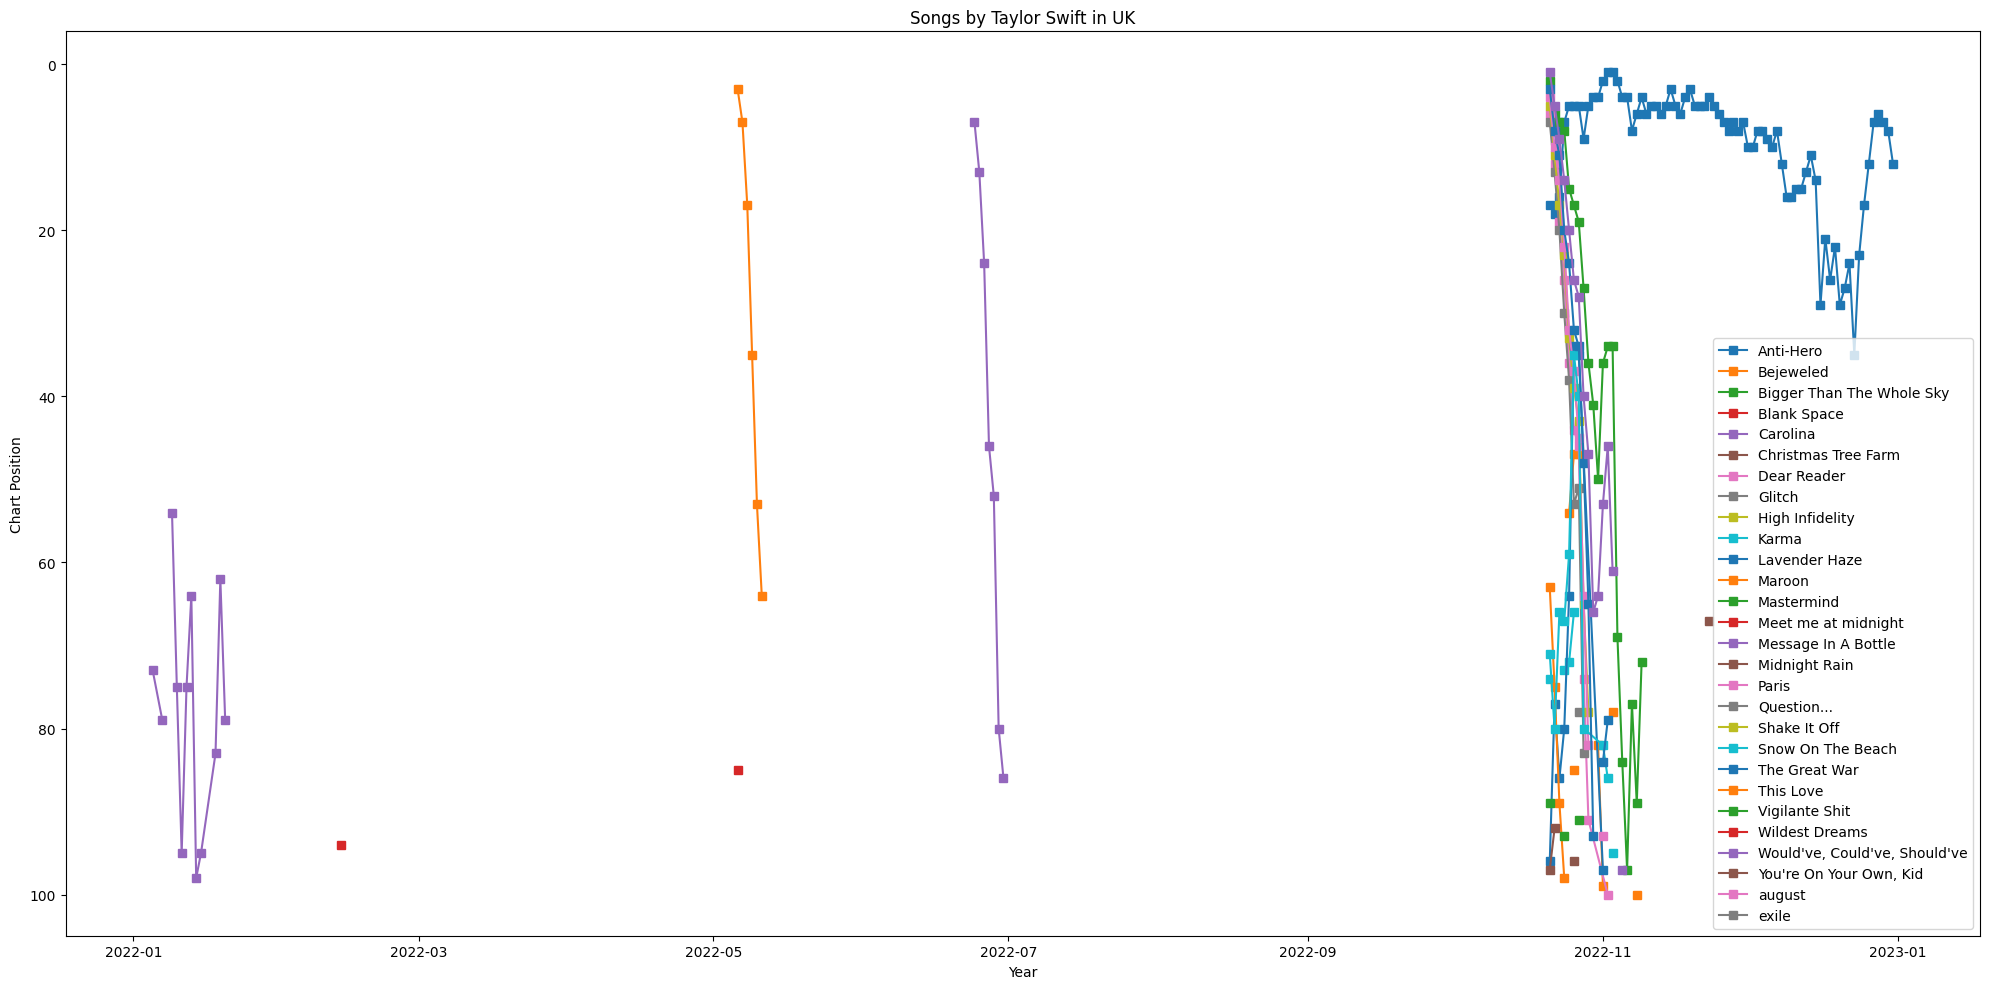

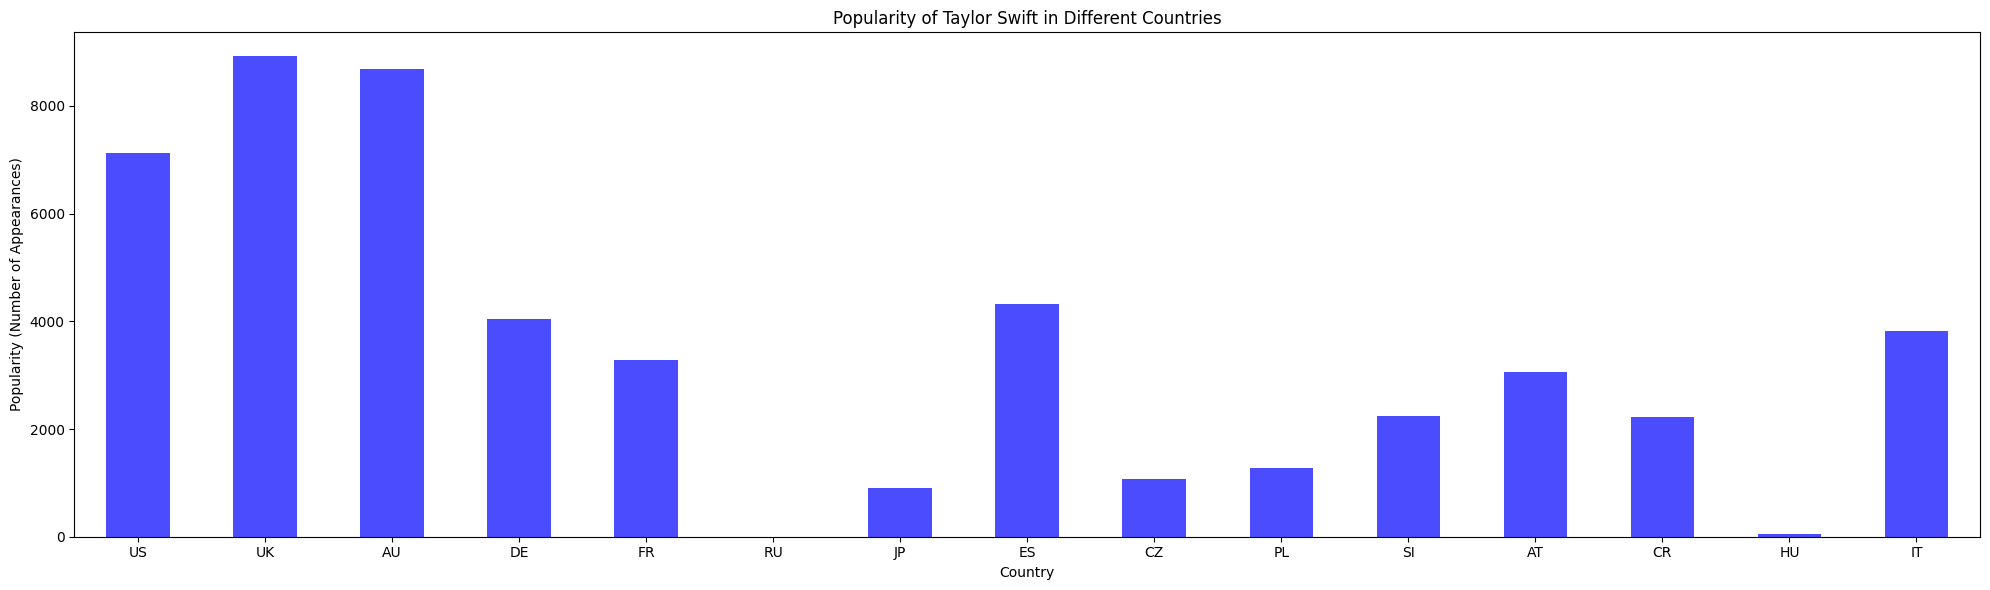

Taylor Swift is most popular in UK and least popular in RU

Best Song Analysis globally:
Title: Anti-Hero
Peak Chart Position: 1
Days at Peak Position: 1.0
Days On Chart: 72


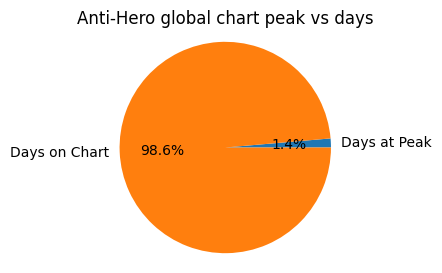

In [624]:
# filtriram artista
artist_data = data[data['Artist'] == favorite_artist]

# ustvarim graf za vsako pesem
plt.figure(figsize=(20, 10))
for song_title, song_data in artist_data.groupby('Title'):
    x = song_data['Date']
    y = song_data[country_data]
    
    plt.plot(x, y, marker = 's', label=song_title, linestyle='-')
if country_data == 'Position':
    plt.title(f'Songs by {favorite_artist} on global charts')
else:
    plt.title(f'Songs by {favorite_artist} in {country_data}')
plt.xlabel('Year')
plt.ylabel('Chart Position')
plt.gca().invert_yaxis()
plt.legend()
plt.tight_layout()

plt.show()

# popularnost za vsako državo
artist_country_popularity = artist_data[country_columns].sum()

plt.figure(figsize=(20, 6))
artist_country_popularity.plot(kind='bar', color='blue', alpha=0.7)
plt.title(f'Popularity of {favorite_artist} in Different Countries')
plt.xlabel('Country')
plt.ylabel('Popularity (Number of Appearances)')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

# Katera pesem je največkrat bila na PCP?
best_song = artist_data.sort_values(by='Peak Chart Poistion').iloc[0]

#Kje je bil najbolj popularen?
most_popular_in_country = artist_country_popularity.idxmax()
least_popular_in_country = artist_country_popularity.idxmin()

#Kratek dodatek k analizi
print(f"{favorite_artist} is most popular in {most_popular_in_country} and least popular in {least_popular_in_country}")
print("\nBest Song Analysis globally:")
print(f"Title: {best_song['Title']}")
print(f"Peak Chart Position: {best_song['Peak Chart Poistion']}")
print(f"Days at Peak Position: {best_song['Days At PCP']}")
print(f"Days On Chart: {best_song['Days On Chart']}")

# Plot
plt.figure(figsize=(3, 3))
plt.pie([best_song['Days At PCP'], best_song['Days On Chart']], labels=['Days at Peak', 'Days on Chart'], autopct='%1.1f%%')
plt.axis('equal')
plt.title(best_song['Title'] + " global chart peak vs days")
plt.show()

Hvala ker ste si ogledali analizo in lep dan še naprej.

Daniel Bartolič 
25.08.2023